In [1]:
import pandas as pd
final_df = pd.read_csv('../Capstone/final_df.csv')

In [2]:
final_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [46]:
final_df.head()

,gsis_id,outcome,defense_ast,defense_ffum,defense_fgblk,defense_frec,defense_frec_tds,defense_frec_yds,defense_int,defense_int_tds,...,team_OAK,team_PHI,team_PIT,team_SD,team_SEA,team_SF,team_STL,team_TB,team_TEN,team_WAS
0,2009091000,1,25,1,1,1,0,5,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009091000,0,32,1,0,1,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2009091300,1,5,3,0,3,0,53,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009091300,0,9,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009091301,1,10,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  Train/Test Split

In [3]:
from sklearn.cross_validation import train_test_split

y = final_df['outcome']
X = final_df.iloc[:, 3:]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
print y_train.shape
print X_train.shape

(2604,)
(2604, 117)


# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [7]:
model = logreg.fit(X_train,y_train)

In [8]:
model.score(X_train, y_train)

0.90937019969278032

In [9]:
from sklearn import metrics

predicted = model.predict(X_test)
prob = model.predict_proba(X_test)

print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, prob[:, 1])

0.870071684588
0.954622227227


In [10]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[470  65]
 [ 80 501]]
             precision    recall  f1-score   support

          0       0.85      0.88      0.87       535
          1       0.89      0.86      0.87       581

avg / total       0.87      0.87      0.87      1116



In [12]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.88978495  0.91666667  0.91129032  0.89516129  0.87634409  0.88172043
  0.89516129  0.91397849  0.8655914   0.84946237]
0.889516129032


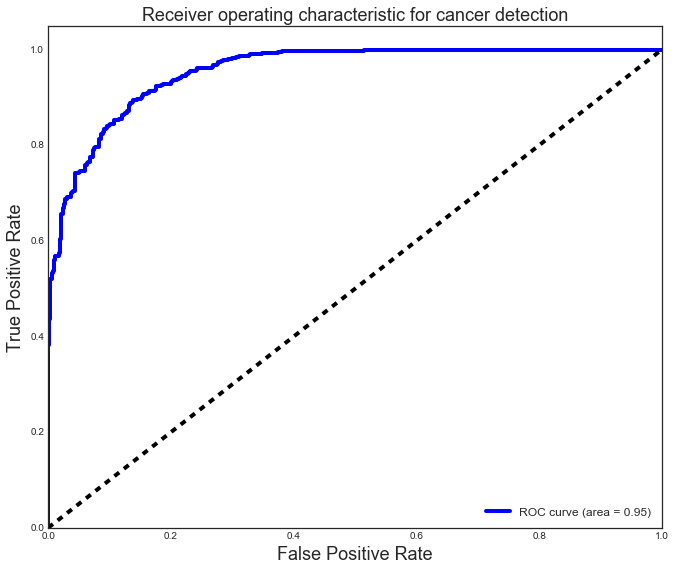

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

y_score = logreg.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [47]:
logreg_params = {
    'penalty':['l1','l2']
}

In [48]:
logreg_gs = GridSearchCV(LogisticRegression(), logreg_params, cv=5, verbose=1)

In [49]:
logreg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   38.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=1)

In [50]:
logreg_best = logreg_gs.best_estimator_
print logreg_best
print logreg_gs.best_params_
print logreg_gs.best_score_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'penalty': 'l1'}
0.888248847926


# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
cross_val_score(dtc, X_train, y_train, cv=5).mean()

0.75882917466410738

In [16]:
dtc_predicted = dtc.predict(X_test)
dtc_prob = dtc.predict_proba(X_test)

print metrics.accuracy_score(y_test, dtc_predicted)
print metrics.roc_auc_score(y_test, dtc_prob[:, 1])
print metrics.confusion_matrix(y_test, dtc_predicted)
print metrics.classification_report(y_test, dtc_predicted)

0.760752688172
0.761122460469
[[412 123]
 [144 437]]
             precision    recall  f1-score   support

          0       0.74      0.77      0.76       535
          1       0.78      0.75      0.77       581

avg / total       0.76      0.76      0.76      1116



In [17]:
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.grid_search import GridSearchCV

dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=5, verbose=1)

In [18]:
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:   10.0s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   14.6s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   20.4s
[Parallel(n_jobs=1)]: Done 1925 out of 1925 | elapsed:   21.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [19]:
dtc_best = dtc_gs.best_estimator_
print dtc_best
print dtc_gs.best_params_
print dtc_gs.best_score_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
{'max_features': None, 'min_samples_split': 2, 'max_depth': 4}
0.799539170507


In [20]:
dtfi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

dtfi.sort_values('importance', ascending=False, inplace=True)
dtfi.head()

,feature,importance
65,rushing_att,0.524034
33,kicking_tot,0.274340
43,passing_incmp,0.099660
41,kickret_yds,0.029308
39,kickret_ret,0.019408


# Bagging Decision Tree

In [21]:
from sklearn.ensemble import BaggingClassifier
bdtc = BaggingClassifier(DecisionTreeClassifier())

cross_val_score(bdtc, X_train, y_train, cv=5, n_jobs=-1)

array([ 0.84644914,  0.79462572,  0.83301344,  0.81573896,  0.80769231])

In [24]:
params = {'base_estimator__max_depth': [3,5,10,20],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
         }

gsbdt = GridSearchCV(bdtc, params, n_jobs=-1, cv=5)

In [25]:
gsbdt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, ...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [0.5, 0.7, 1.0], 'max_samples': [0.5, 0.7, 1.0], 'base_estimator__max_depth': [3, 5, 10, 20], 'n_estimators': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [26]:
gsbdt_predicted = gsbdt.predict(X_test)
gsbdt_prob = gsbdt.predict_proba(X_test)

print metrics.accuracy_score(y_test, gsbdt_predicted)
print metrics.roc_auc_score(y_test, gsbdt_prob[:, 1])

0.829749103943
0.923998262744


In [27]:
gsbdt.best_params_

{'base_estimator__max_depth': 10,
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 20}

In [28]:
gsbdt.best_score_

0.84485407066052232

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [30]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
cross_val_score(rfc, X_train, y_train, cv=5)

array([ 0.86372361,  0.81573896,  0.82917466,  0.81573896,  0.80961538])

In [32]:
rfc_predicted = rfc.predict(X_test)
rfc_prob = rfc.predict_proba(X_test)

print metrics.accuracy_score(y_test, rfc_predicted)
print metrics.roc_auc_score(y_test, rfc_prob[:, 1])

0.820788530466
0.903514726463


In [33]:
rfc_gs = GridSearchCV(RandomForestClassifier(), dtc_params, cv=5, verbose=1)

In [34]:
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   13.4s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   24.2s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   37.6s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:   53.8s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done 1925 out of 1925 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [35]:
rfc_best = rfc_gs.best_estimator_
print rfc_best
print rfc_gs.best_params_
print rfc_gs.best_score_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'max_features': 'sqrt', 'min_samples_split': 50, 'max_depth': None}
0.84178187404


In [36]:
rffi = pd.DataFrame({
        'feature':X.columns,
        'importance':rfc_best.feature_importances_
    })

rffi.sort_values('importance', ascending=False, inplace=True)
rffi.head()

,feature,importance
65,rushing_att,0.135061
33,kicking_tot,0.109143
43,passing_incmp,0.064723
75,Downs,0.059906
79,Interception,0.053363


In [37]:
print metrics.confusion_matrix(y_test, rfc_predicted)
print metrics.classification_report(y_test, rfc_predicted)


[[463  72]
 [128 453]]
             precision    recall  f1-score   support

          0       0.78      0.87      0.82       535
          1       0.86      0.78      0.82       581

avg / total       0.82      0.82      0.82      1116



In [38]:
rfc_prob

array([[ 0.5,  0.5],
       [ 0.1,  0.9],
       [ 0.5,  0.5],
       ..., 
       [ 0.5,  0.5],
       [ 0.8,  0.2],
       [ 0. ,  1. ]])